# ACSE-2 Assignment 1

A porous bed of activated carbon is used to remove impurities from water. We can assume that Darcy’s law holds for the flow of liquid within the block, which means that it can be solved as a potential flow problem.
We will assume that there is no flow out of the front or back of the bed, resulting in a 2-dimensional flow pattern, with the bed being 1 m long in this direction. The bed is 2 m wide and 1 m deep. Liquid is forced into the bottom of the bed at a flowrate of 120 l/min. We can assume that the vertical flux is constant over the bottom of the bed. The flow then splits evenly out of the 2 sides of the bed. You can assume that on the open sides the liquid flows out of the entire height of bed and that the horizontal flux is constant over these boundaries.
You should use a stream function formulation to solve this problem



## a) Boundaries 
Calculate the values of the stream function along all the boundaries of the system.

set stream function at (2,0) as 0

In [14]:
import numpy as np
import matplotlib.pyplot as plt
dx = 0.02
dy = 0.02

In [15]:
##non transverse
def set_up_psi(dx):
    dy = dx
        
    ny = int(1/dy)+1
    nx = int(2/dx)+1
    
    x = np.linspace(0,2,nx)
    y = np.linspace(0,1,ny)

    psi = np.zeros([ny,nx])   
    psi[0]=0.12-0.06*x[:]
    psi[-1]=0.06
    psi[:,-1]=0.06*y[:]
    psi[:,0]=0.12-0.06*y[:]

    return psi
psi = set_up_psi(dx)

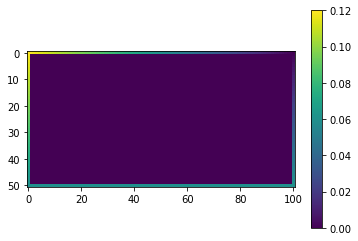

In [16]:
#plot the boundaries

plt.imshow(psi)
plt.colorbar()

## b) SOR to solve for stream function within the block

Use Simultaneous Over Relaxation (SOR) to solve for the values of the stream function within the block. Use ∆𝑥 = ∆𝑦 = 0.01 𝑚. Plot the resultant values of the stream function.Note that this program will be very similar to the one that you wrote for the class worksheet.

In [17]:
def approx_psi(deltax,psi,relx = 1.5,tol=1.0e-10):
    a=b=c=d=1
    e=-4
    f=0
    ny = int(1/deltax)+1
    nx = int(2/deltax)+1
    
    tol_res = tol+1

    
    boolmask=np.zeros([ny-2,nx-2])
    boolmask[::2,::2]+=1
    boolmask[1::2,1::2]+=1
    
    while tol_res>tol:

        res = a*psi[:-2,1:-1]+b*psi[2:,1:-1]+c*psi[1:-1,2:]+d*psi[1:-1,:-2]+e*psi[1:-1,1:-1]-f
        
        psi[1:-1,1:-1]-=relx*res/e*boolmask
        boolmask=1-boolmask
        
        tol_res=abs(res).sum()
        tol_res=tol_res/((nx-2)*(ny-2))

    return psi

psi = approx_psi(dx,psi,relx = 1.5,tol=1.0e-10)

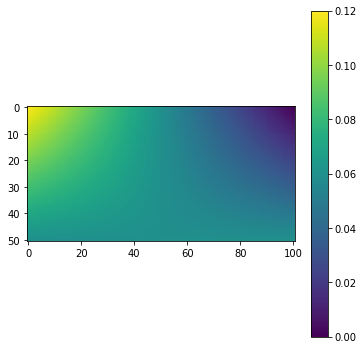

In [18]:
plt.figure(figsize=[6,6])
plt.imshow(psi)
plt.colorbar()

## c) Flux

Use the calculated stream function values to obtain the values of the liquid flux at all points within the bed. Use the following approximations (and the equivalent ones in the y direction) as appropriate:

Central Difference

Forward Difference

Backward Difference




Use the quiver() function to plot the results.

In [19]:
dtx=np.zeros([int(1/dy)+1,int(2/dx)+1])
dty=dtx.copy()
dty[:,1:-1]=(psi[:,2:]-psi[:,:-2])/2/dy
dty[:,0]=(psi[:,1]-psi[:,0])/dy
dty[:,-1]=(psi[:,-1]-psi[:,-2])/dy

dtx[1:-1,:]=(psi[2:,:]-psi[:-2,:])/2/dx
dtx[0,:]=(psi[1,:]-psi[0,:])/dx
dtx[-1,:]=(psi[-1,:]-psi[-2,:])/dx


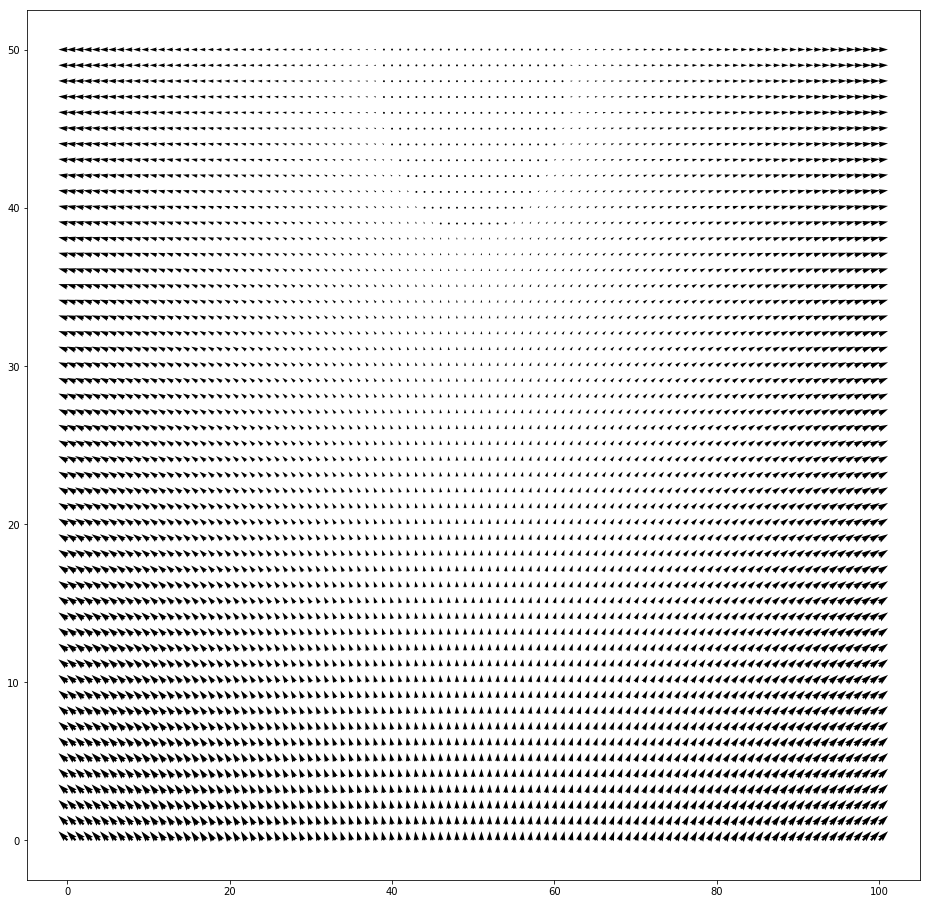

In [20]:
plt.figure(figsize=[16,16])
plt.quiver(dtx, -dty, units='width')
#plt.gca().invert_yaxis()

## d) Analytical solution

Derive the analytical solution to this problem in the form of an infinite series. Write a program to calculate this series out to an appropriate number of iterations. Compare the analytical solution to the numerical solution from part b). How does the discrepancy between the results change as the ∆𝑥 in part b is changed (still assuming that ∆𝑥 = ∆𝑦). Note that this is thus a convergence analysis. (40 marks)

In [21]:
def ana_sol(deltax,n_max=110):
    
    ny = int(1/deltax)+1
    nx = int(2/deltax)+1
    psi_analy = np.zeros([ny,nx])
    n_list = np.linspace(1,n_max,n_max)

    gamma=np.zeros([4,n_max])

    #left, right, top, bottom; h,m,c,w
    para = np.array([[1,-0.06,0.12,2],[1,0.06,0,2],[2,0,0.06,1],[2,-0.06,0.12,1]])

    #gam = -2/np.pi/n_list*((-1)**n_list*(h*m+c)-c)
    for i in range(4):
        gamma[i,:] = -2/np.pi/n_list*((-1)**n_list*(para[i,0]*para[i,1]+para[i,2])-para[i,2])

    def ana_cal(rank,n_list,x,y,m,c,h,w):#whole set
        return sum(gamma[rank]*np.sin(n_list*np.pi*y/h)*
                   (np.cosh(n_list*np.pi*x/h)-
                    np.sinh(n_list*np.pi*x/h)/np.tanh(np.pi*n_list*w/h)))


    for i in range(ny):
        for j in range(nx):
            x=j*deltax
            y=i*deltax
            #left
            psi_analy[i,j]+=ana_cal(0,n_list,x,y,para[0,1],para[0,2],para[0,0],para[0,3])
            #right
            psi_analy[i,j]+=ana_cal(1,n_list,2-x,y,para[1,1],para[1,2],para[1,0],para[1,3])
            #top
            psi_analy[i,j]+=ana_cal(2,n_list,1-y,x,para[2,1],para[2,2],para[2,0],para[2,3])
            #bottom
            psi_analy[i,j]+=ana_cal(3,n_list,y,x,para[3,1],para[3,2],para[3,0],para[3,3])
    
    return psi_analy

psi_analy = ana_sol(dx,n_max=110)

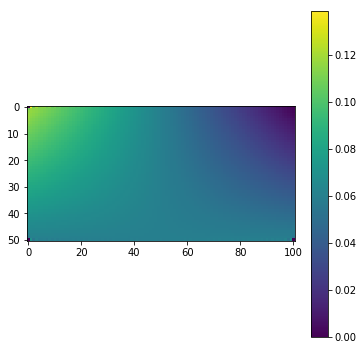

In [22]:
plt.figure(figsize=[6,6])
plt.imshow(psi_analy)
plt.colorbar()

### Compare discrepancy

In [23]:
def compare_dis(psi,psi_analy):
    eb = 1
    comp_ana=psi_analy[eb:-eb,eb:-eb]
    comp_aprx=psi[eb:-eb,eb:-eb]
    return comp_ana-comp_aprx

diff =compare_dis(psi,psi_analy)

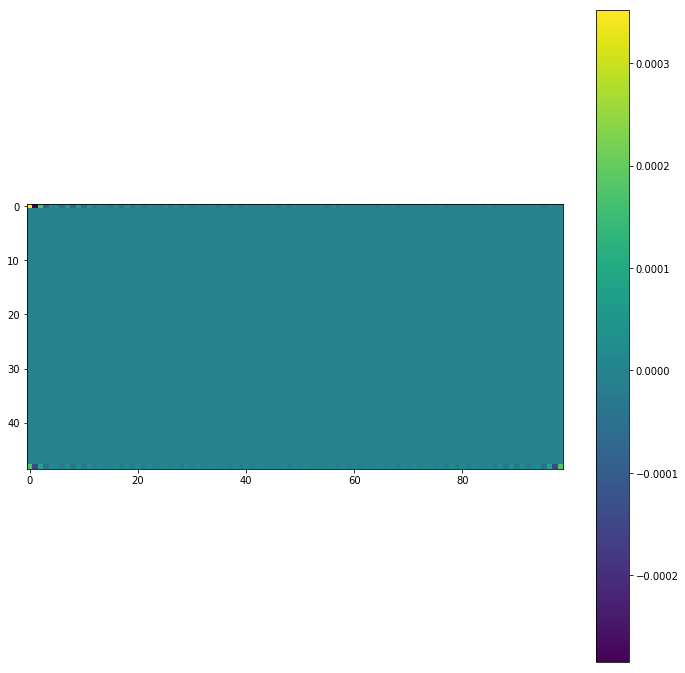

In [24]:
plt.figure(figsize=[12,12])
plt.imshow(diff)
plt.colorbar()

### Compare change of discrepancy with dx

In [25]:
deltaxs = np.arange(0.01,0.5,0.01)
ave_diff = np.zeros([len(deltaxs)])

iterate = 0
for deltax in deltaxs:
    
    psi = set_up_psi(deltax)
    diff = compare_dis(approx_psi(deltax,psi,relx = 0.6,tol=1.0e-8),ana_sol(deltax,n_max=110))
    ave_diff[iterate] = np.mean(diff)
    iterate +=1
    if deltax%5==0:
        print('dx = %.2f is finished' % (deltax))

Text(0, 0.5, 'mean of discrepancy')

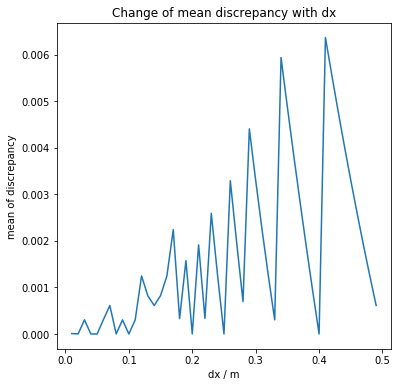

In [26]:
plt.figure(figsize=[6,6])
plt.plot(deltaxs,ave_diff)
plt.title('Change of mean discrepancy with dx')
plt.xlabel('dx / m')
plt.ylabel('mean of discrepancy')

## Discussions

### The above pictures indicate that the discrepancy has a higher amplitude: the fluctuation of discrepancy becomes more and more significant.

### When dx equals to values like 0.01, 0.02, 0.04, 0.05, 0.1, 0.2 etc., the discrepancy becomes close to zero.

### When dx gets larger, discrepancy has a overall increasing trendency.

### The difference between SOR solution and analytical solution shows a periodic pattern, which is caused by the nature of Fourier Series.